In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("../data/covid19-cleaned.csv")

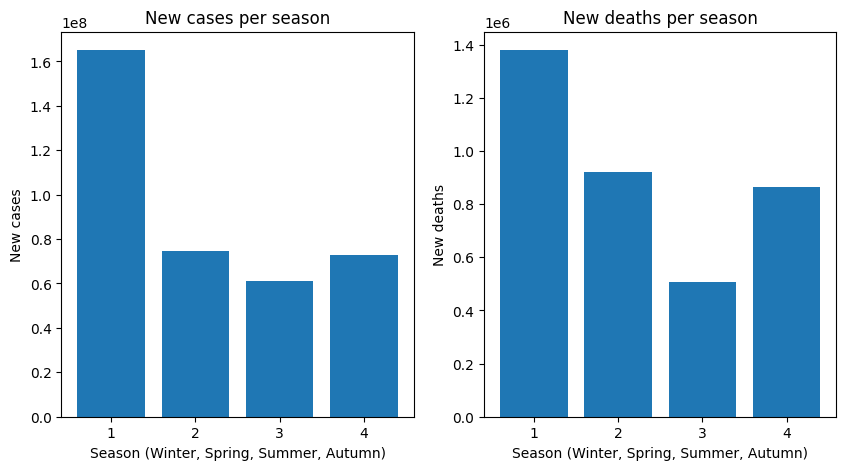

In [9]:
# Select only Europe and North America
data = data[data["continent"].isin(["Europe", "North America"])]

# Select only the columns we need
data = data[["continent", "location", "date", "new_cases", "new_deaths"]]

# Group data by month and sum the values
data["date"] = pd.to_datetime(data["date"])
data = data.groupby(pd.Grouper(key="date", freq="M")).sum().reset_index()

# Sum the values for seasons
# 12, 1, 2 - winter
# 3, 4, 5 - spring
# 6, 7, 8 - summer
# 9, 10, 11 - autumn
data["season"] = data["date"].dt.month

data.loc[data["season"].isin([12, 1, 2]), "season"] = 1
data.loc[data["season"].isin([3, 4, 5]), "season"] = 2
data.loc[data["season"].isin([6, 7, 8]), "season"] = 3
data.loc[data["season"].isin([9, 10, 11]), "season"] = 4

data = data.drop("date", axis=1)
data = data.groupby("season").sum().reset_index()

# Create two plots: one for cases, one for deaths
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.bar(data["season"], data["new_cases"])
ax1.set_title("New cases per season")
ax1.set_xlabel("Season (Winter, Spring, Summer, Autumn)")
ax1.set_ylabel("New cases")

ax2.bar(data["season"], data["new_deaths"])
ax2.set_title("New deaths per season")
ax2.set_xlabel("Season (Winter, Spring, Summer, Autumn)")
ax2.set_ylabel("New deaths")

plt.show()

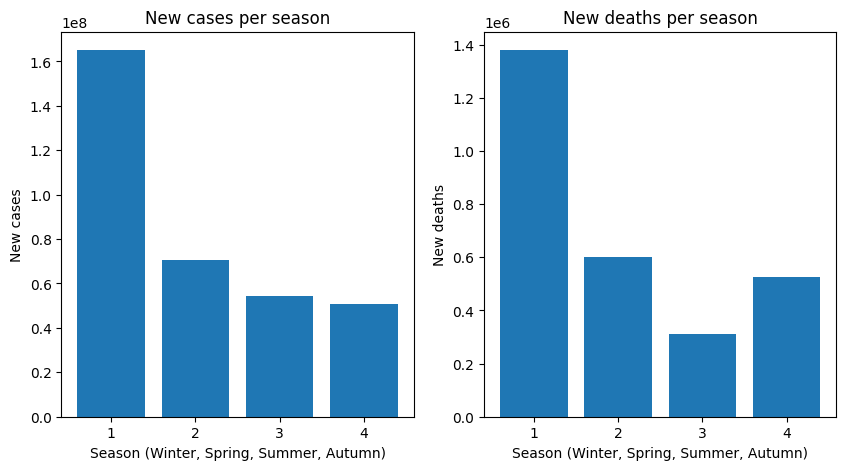

In [10]:
# Repeat the above, but only include data starting in December 2020
data = pd.read_csv("../data/covid19-cleaned.csv")

# Select only Europe and North America
data = data[data["continent"].isin(["Europe", "North America"])]

# Select only the columns we need
data = data[["continent", "location", "date", "new_cases", "new_deaths"]]
data = data[data["date"] >= "2020-12-01"]

# Group data by month and sum the values
data["date"] = pd.to_datetime(data["date"])
data = data.groupby(pd.Grouper(key="date", freq="M")).sum().reset_index()

# Sum the values for seasons
# 12, 1, 2 - winter
# 3, 4, 5 - spring
# 6, 7, 8 - summer
# 9, 10, 11 - autumn
data["season"] = data["date"].dt.month

data.loc[data["season"].isin([12, 1, 2]), "season"] = 1
data.loc[data["season"].isin([3, 4, 5]), "season"] = 2
data.loc[data["season"].isin([6, 7, 8]), "season"] = 3
data.loc[data["season"].isin([9, 10, 11]), "season"] = 4

data = data.drop("date", axis=1)
data = data.groupby("season").sum().reset_index()

# Create two plots: one for cases, one for deaths
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.bar(data["season"], data["new_cases"])
ax1.set_title("New cases per season")
ax1.set_xlabel("Season (Winter, Spring, Summer, Autumn)")
ax1.set_ylabel("New cases")

ax2.bar(data["season"], data["new_deaths"])
ax2.set_title("New deaths per season")
ax2.set_xlabel("Season (Winter, Spring, Summer, Autumn)")
ax2.set_ylabel("New deaths")

plt.show()